In [1]:
import xarray as xr
import numpy as np
import matplotlib.pyplot as plt
import drpy
import glob
import sys
sys.path.insert(1, '/home/alfonso/Documents/camp2ex_proj/src')
from apr3_read import hdf2xr
from utils import time_3d

In [2]:
paht_data = '/home/alfonso/Documents/camp2ex_proj/data/test'
ls_files = glob.glob(f'{paht_data}/*KUsKAsWn.h5')
ls_files[-3]

'/home/alfonso/Documents/camp2ex_proj/data/test/CAMP2Ex-APR3-L2ZV_P3B_20190915_R0_S20190916a030711_E20190916a031716_KUsKAsWn.h5'

In [8]:
%%timeit 
ds_xr = hdf2xr(ls_files[-3], groups=['lores'])['lores']

12.1 s ± 81.1 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [7]:
ds_xr

<xarray.Dataset>
Dimensions:            (bin_size: 1, cross_track: 25, range: 456, time: 327, vector: 3)
Coordinates:
  * cross_track        (cross_track) int64 0 1 2 3 4 5 6 ... 19 20 21 22 23 24
  * time               (time) datetime64[ns] 2019-09-16T03:07:12.499800 ... 2...
    lon3d              (range, cross_track, time) float64 119.2 119.3 ... 120.0
    lat3d              (range, cross_track, time) float64 8.818 8.817 ... 8.605
    alt3d              (range, cross_track, time) float64 8.703e+03 ... -4.31...
Dimensions without coordinates: bin_size, range, vector
Data variables: (12/57)
    DR                 (bin_size) float64 29.98
    Xat_km             (cross_track, time) float64 0.0 0.2873 ... 93.22 93.52
    alt3D              (range, cross_track, time) float64 8.703e+03 ... -4.31...
    alt_nav            (cross_track, time) float64 6.792e+03 ... 6.79e+03
    altsurf14          (cross_track, time) float64 -54.59 110.8 ... -4.167 2.537
    altsurf35          (cross_track, time) float64 -54.59 110.8 ... -4.167 2.537
    ...                 ...
    zhh35SP            (range, cross_track, time) float64 -inf -inf ... -inf
    s095s              (range, cross_track, time) float64 nan nan ... nan nan
    sig95s             (range, cross_track, time) float64 nan nan ... nan nan
    vel95s             (range, cross_track, time) float64 nan nan ... nan nan
    v_surf             (range, cross_track, time) float64 nan nan ... nan nan
    v_surfdc8          (range, cross_track, time) float64 nan nan ... nan nan

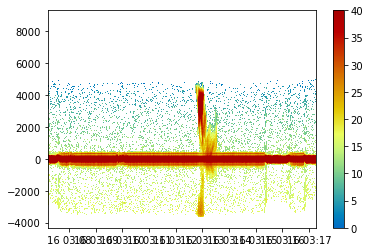

In [9]:
plt.pcolormesh(time_3d(ds_xr.scantime,ds_xr.alt3D.shape[0])[:,12,:], ds_xr.alt3D[:,12,:], ds_xr.zhh14[:,12,:],
               cmap=drpy.graph.cmaps.HomeyerRainbow,vmin=0,vmax=40)
plt.colorbar()

In [14]:
apr = drpy.core.APR()

In [23]:
apr.read(filename=ls_files[-3],campaign='camp2ex')

No W band


In [24]:
apr.xrds

<xarray.Dataset>
Dimensions:  (along_track: 327, cross_track: 25, range: 456)
Coordinates:
    lon3d    (range, cross_track, along_track) float64 119.2 119.3 ... 120.0
    lat3d    (range, cross_track, along_track) float64 8.818 8.817 ... 8.605
    time3d   (range, cross_track, along_track) datetime64[ns] 2019-09-16T03:0...
    alt3d    (range, cross_track, along_track) float64 8.703e+03 ... -4.313e+03
Dimensions without coordinates: along_track, cross_track, range
Data variables:
    Ku       (range, cross_track, along_track) float64 nan nan nan ... nan nan
    Ka       (range, cross_track, along_track) float64 nan nan nan ... nan nan
    DopKu    (range, cross_track, along_track) float64 nan nan nan ... nan nan
    W        (range, cross_track, along_track) float64 nan nan nan ... nan nan
    LDR      (range, cross_track, along_track) float64 nan nan nan ... nan nan
    Roll     (cross_track, along_track) float64 15.48 20.2 22.18 ... 23.26 23.28
    surf     (cross_track, along_track) float64 386.0 402.0 ... 312.0 312.0

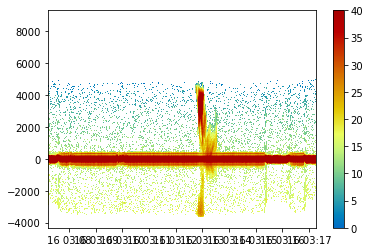

In [25]:
plt.pcolormesh(apr.xrds.time3d[:,12,:],apr.xrds.alt3d[:,12,:],apr.xrds.Ku[:,12,:],
               cmap=drpy.graph.cmaps.HomeyerRainbow,vmin=0,vmax=40)
plt.colorbar()

Text(0.5, 1.0, 'New development')

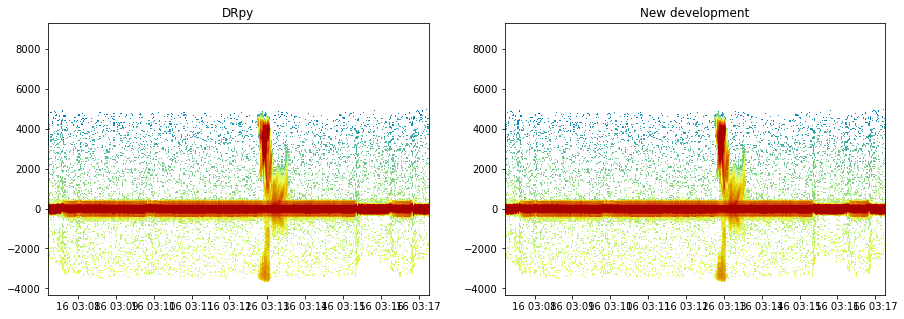

In [27]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))
ax1.pcolormesh(apr.xrds.time3d[:,12,:],apr.xrds.alt3d[:,12,:],apr.xrds.Ku[:,12,:],
               cmap=drpy.graph.cmaps.HomeyerRainbow,vmin=0,vmax=40)
ax1.set_title('DRpy')
plt.pcolormesh(apr.xrds.time3d[:,12,:],apr.xrds.alt3d[:,12,:],apr.xrds.Ku[:,12,:],
               cmap=drpy.graph.cmaps.HomeyerRainbow,vmin=0,vmax=40)
ax2.set_title('New development')


In [37]:
ds_detailed = ds_xr.sel(time=slice('2019-09-16 03:12', '2019-09-16 03:14'))


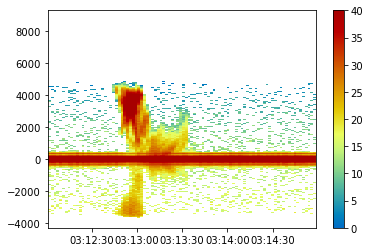

In [38]:
plt.pcolormesh(time_3d(ds_detailed.scantime,ds_detailed.alt3D.shape[0])[:,12,:], ds_detailed.alt3D[:,12,:], 
               ds_detailed.zhh14[:,12,:],
               cmap=drpy.graph.cmaps.HomeyerRainbow,vmin=0,vmax=40)
plt.colorbar()

In [41]:
drpy_detailed = apr.xrds.sel(time=slice('2019-09-15 22:12', '2019-09-15 22:14'))

ValueError: dimensions or multi-index levels ['time'] do not exist